Alireza Kheirnadhish

Student number : 97101604

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [43]:
game = pd.read_csv('./Data/HW2_data/international_matches.csv')
game.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


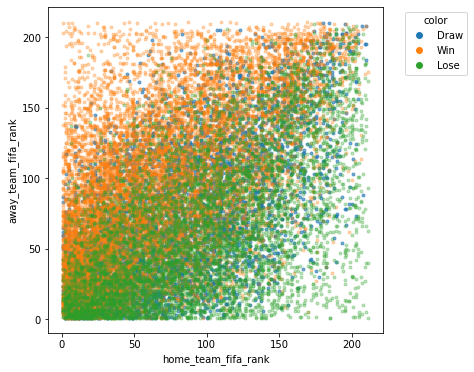

In [44]:
fig, ax = plt.subplots(figsize=(6, 6))

colors = {'Draw':'tab:blue', 'Win':'tab:orange', 'Lose':'tab:green'}

D = game["home_team_result"] == "Draw"
W = game["home_team_result"] == "Win"
L = game["home_team_result"] == "Lose"

ax.scatter(game["home_team_fifa_rank"][D], game["away_team_fifa_rank"][D], c=colors['Draw'],alpha=.6,marker = '.')
ax.scatter(game["home_team_fifa_rank"][W], game["away_team_fifa_rank"][W], c=colors['Win'],alpha=.3,marker = '.')
ax.scatter(game["home_team_fifa_rank"][L], game["away_team_fifa_rank"][L], c=colors['Lose'],alpha=.3,marker = '.')

ax.set_xlabel("home_team_fifa_rank")
ax.set_ylabel("away_team_fifa_rank")
from matplotlib.lines import Line2D

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

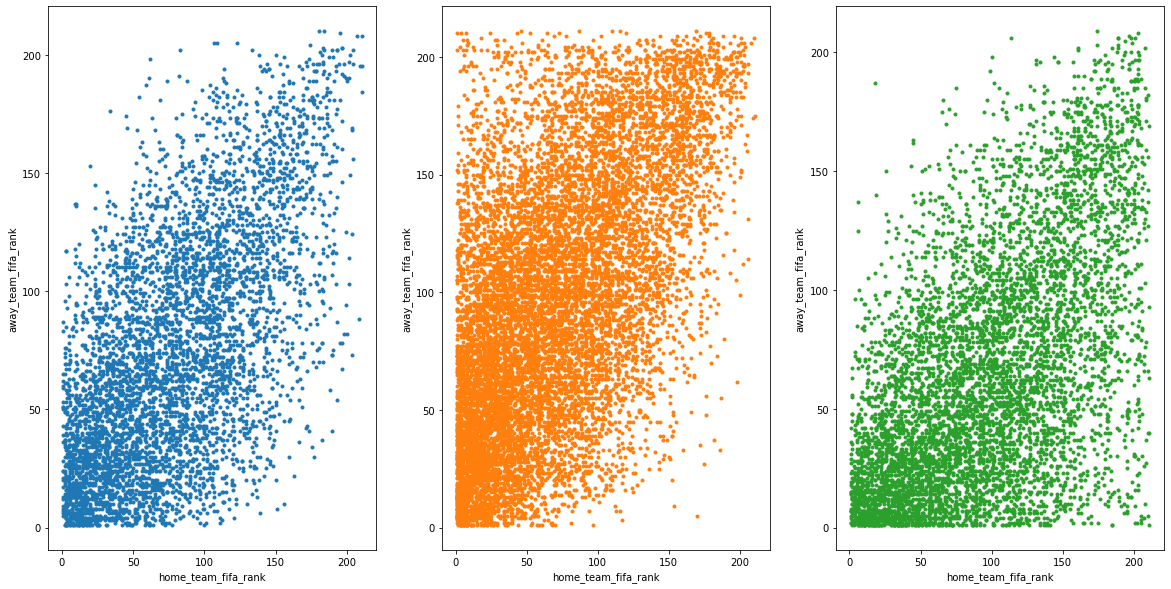

In [45]:
fig, ax = plt.subplots(1,3,figsize=(20, 10))
colors = {'Draw':'tab:blue', 'Win':'tab:orange', 'Lose':'tab:green'}
ax[0].scatter(game["home_team_fifa_rank"][D],game["away_team_fifa_rank"][D], c=colors['Draw'], marker = '.')
ax[0].set_xlabel("home_team_fifa_rank")
ax[0].set_ylabel("away_team_fifa_rank")
ax[1].scatter(game["home_team_fifa_rank"][W],game["away_team_fifa_rank"][W], c=colors['Win'], marker = '.')
ax[1].set_xlabel("home_team_fifa_rank")
ax[1].set_ylabel("away_team_fifa_rank")
ax[2].scatter(game["home_team_fifa_rank"][L],game["away_team_fifa_rank"][L], c=colors['Lose'], marker = '.')
ax[2].set_xlabel("home_team_fifa_rank")
ax[2].set_ylabel("away_team_fifa_rank")
plt.show()

In [46]:
columns = ["away_team_fifa_rank", "home_team_fifa_rank", "home_team_total_fifa_points", "away_team_total_fifa_points", "home_team_result"]
df = pd.DataFrame()
for column in columns:
    df[column] = game[column]

In [47]:
colummns = ["away_team_total_fifa_points", "home_team_total_fifa_points"]
for column in columns:
    df = df.iloc[[not i for i in list(df[column] == 0)]]

In [48]:
result = df["home_team_result"]
result = result.reset_index(drop=True)
del df["home_team_result"]
df = df.reset_index(drop=True)


In [49]:
result

0        Win
1       Draw
2        Win
3        Win
4       Lose
        ... 
9589     Win
9590    Lose
9591    Lose
9592    Lose
9593     Win
Name: home_team_result, Length: 9594, dtype: object

In [50]:
N = df.shape[0]
sampleSize = np.int(0.75*N // 1)
x_train = np.array(df)[:sampleSize,:]
y_train = np.array(result)[:sampleSize]
x_test = np.array(df)[sampleSize:,:]
y_test = np.array(result)[sampleSize:]

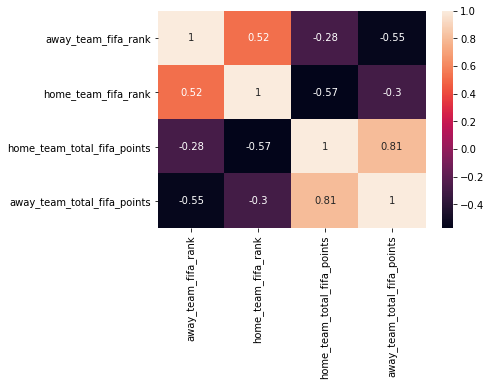

In [57]:
dataplot = sns.heatmap(df.corr(), annot=True)


In [58]:
import torch.nn as nn


In [114]:

import copy
ytrain = copy.copy(y_train)
ytrain[ytrain == 'Win'] = 1
ytrain[ytrain == 'Draw'] = 0
ytrain[ytrain == 'Lose'] = 2
ytrain = ytrain.astype('int64')
ytest = copy.copy(y_test)
ytest[ytest == 'Win'] = 1
ytest[ytest == 'Draw'] = 0
ytest[ytest == 'Lose'] = 2
ytest = ytest.astype('int64')


In [115]:
ytest

array([0, 1, 2, ..., 2, 2, 1])

In [116]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    

In [117]:
model = NeuralNetwork()
model.train()

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [118]:
learning_rate = 0.001
batch_size = 30
epochs = 5

In [119]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [120]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [121]:
import torch.utils.data as data_utils
train = data_utils.TensorDataset(torch.Tensor(x_train).type(torch.torch.FloatTensor ), torch.Tensor(ytrain).type(torch.torch.LongTensor ))
train_dataloader = data_utils.DataLoader(train, batch_size = batch_size, shuffle = True)

test = data_utils.TensorDataset(torch.Tensor(x_test).type(torch.FloatTensor), torch.Tensor(ytest).type(torch.LongTensor))
test_dataloader = data_utils.DataLoader(test, batch_size = batch_size, shuffle = True)




In [134]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: Accuracy: {(100*correct)}%\n")

In [136]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 7
for t in range(epochs):
    print(f"#{t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

#1
-------------------------------
Test Error: Accuracy: 60.817007086285955%

#2
-------------------------------
Test Error: Accuracy: 60.900375156315135%

#3
-------------------------------
Test Error: Accuracy: 60.56690287619841%

#4
-------------------------------
Test Error: Accuracy: 60.858691121300545%

#5
-------------------------------
Test Error: Accuracy: 60.858691121300545%

#6
-------------------------------
Test Error: Accuracy: 60.73363901625677%

#7
-------------------------------
Test Error: Accuracy: 61.06711129637349%

Done!


In [145]:
data = {  "away_team_fifa_rank": [19, 16, 5],  #Wales, USA, England
          "home_team_fifa_rank": [20, 20, 20],
          "home_team_total_fifa_points": [1564, 1564, 1564],
          "away_team_total_fifa_points": [1569, 1627, 1728]
        }
x = torch.Tensor( np.array([[19, 16, 5],
              [20, 20, 20],
              [1564, 1564, 1564],
              [1569, 1627, 1728]]).T)
y = torch.Tensor([0,0,0])

test = data_utils.TensorDataset(x, y)

dataloader = data_utils.DataLoader(test, shuffle = False)
for batch, (z, y) in enumerate(dataloader):
    pred = model(z)
    print(batch, pred[0], pred.argmax(1))

0 tensor([-0.2970,  0.2289, -0.1353], grad_fn=<SelectBackward>) tensor([1])
1 tensor([-0.3318,  0.2480,  0.3352], grad_fn=<SelectBackward>) tensor([2])
2 tensor([-0.3120,  0.2302,  0.5213], grad_fn=<SelectBackward>) tensor([2])


The model creat this result:             
(0) : Iran - Wales : Win                        
(1) : Iran - USA : Lose                      
(2) : Iran - England : Lose


In [146]:
torch.save(model , 'Q2.pth')
